<a href="https://colab.research.google.com/github/prakash1999mohanty/Data-Analytics/blob/main/Uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('/content/uberdrive.csv',encoding='ISO_8859_1')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
# Information about all the variables of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
# First 10 records of the dataset.
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [5]:
# Last 10 records of the dataset.
df.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Karachi,Karachi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Karachi,Karachi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Karachi,Karachi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Karachi,Karachi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
# Dimension of the data set
df.ndim

2

In [7]:
# Check for missing values.
df.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [8]:
# How many missing values are present.
A=df.isnull().sum().sum()
A

np.int64(507)

In [9]:
# Get the initial data with dropping the NA values
df.dropna()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
# Rename column name
d={'START_DATE*':'START_DATE','END_DATE*':'END_DATE','CATEGORY*':'CATEGORY','START*':'PICK_UP','STOP*':'DROP_OFF','MILES*':'KM','PURPOSE*':'PURPOSE'}
df.rename(columns=d,inplace=True)
df

,START_DATE,END_DATE,CATEGORY,PICK_UP,DROP_OFF,KM,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [27]:
# Change data type
df['TIME']=pd.to_datetime(df['START_DATE'],format='mixed',errors='coerce')
df
# Split the column
df['START_TIME']=df['TIME'].dt.hour#dt is na accessor or to extract the particular component like(year,date,hour) before using dt.(attribute)ew need datetime column
df

,START_DATE,END_DATE,CATEGORY,PICK_UP,DROP_OFF,KM,PURPOSE,TIME,START_TIME
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,21.0
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,1.0
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,20.0
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,17.0
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,14.0
...,...,...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site,2016-12-31 13:24:00,13.0
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31 15:03:00,15.0
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31 21:32:00,21.0
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,2016-12-31 22:08:00,22.0


In [42]:
df['TIMES']=pd.to_datetime(df['END_DATE'],format='mixed',errors='coerce')
df
df['END_TIME']=df['TIMES'].dt.hour
df

,START_TIME,KM,PURPOSE,START_DATE,END_DATE,CATEGORY,PICK_UP,DROP_OFF,TIMES,END_TIME
0,21.0,5.1,Meal/Entertain,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,2016-01-01 21:17:00,21.0
1,1.0,5.0,NaN,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,2016-01-02 01:37:00,1.0
2,20.0,4.8,Errand/Supplies,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,2016-01-02 20:38:00,20.0
3,17.0,4.7,Meeting,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,2016-01-05 17:45:00,17.0
4,14.0,63.7,Customer Visit,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,2016-01-06 15:49:00,15.0
...,...,...,...,...,...,...,...,...,...,...
1151,13.0,3.9,Temporary Site,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,2016-12-31 13:42:00,13.0
1152,15.0,16.2,Meeting,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,2016-12-31 15:38:00,15.0
1153,21.0,6.4,Temporary Site,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,2016-12-31 21:50:00,21.0
1154,22.0,48.2,Temporary Site,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,2016-12-31 23:51:00,23.0


In [44]:
df['DATE']=pd.to_datetime(df['START_DATE'],format='mixed',errors='coerce').dt.hour
df

,START_TIME,KM,PURPOSE,START_DATE,END_DATE,CATEGORY,PICK_UP,DROP_OFF,TIMES,END_TIME,DATE
0,21.0,5.1,Meal/Entertain,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,2016-01-01 21:17:00,21.0,21.0
1,1.0,5.0,NaN,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,2016-01-02 01:37:00,1.0,1.0
2,20.0,4.8,Errand/Supplies,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,2016-01-02 20:38:00,20.0,20.0
3,17.0,4.7,Meeting,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,2016-01-05 17:45:00,17.0,17.0
4,14.0,63.7,Customer Visit,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,2016-01-06 15:49:00,15.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
1151,13.0,3.9,Temporary Site,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,2016-12-31 13:42:00,13.0,13.0
1152,15.0,16.2,Meeting,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,2016-12-31 15:38:00,15.0,15.0
1153,21.0,6.4,Temporary Site,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,2016-12-31 21:50:00,21.0,21.0
1154,22.0,48.2,Temporary Site,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,2016-12-31 23:51:00,23.0,22.0


df.info()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   PICK_UP     1155 non-null   object 
 4   DROP_OFF    1155 non-null   object 
 5   KM          1156 non-null   float64
 6   PURPOSE     653 non-null    object 
 7   START_TIME  1155 non-null   float64
 8   END_TIME    1155 non-null   float64
dtypes: float64(3), object(6)
memory usage: 81.4+ KB


In [37]:
df

,START_TIME,KM,PURPOSE,START_DATE,END_DATE,CATEGORY,PICK_UP,DROP_OFF
0,21.0,5.1,Meal/Entertain,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce
1,1.0,5.0,NaN,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce
2,20.0,4.8,Errand/Supplies,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce
3,17.0,4.7,Meeting,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce
4,14.0,63.7,Customer Visit,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach
...,...,...,...,...,...,...,...,...
1151,13.0,3.9,Temporary Site,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location
1152,15.0,16.2,Meeting,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location
1153,21.0,6.4,Temporary Site,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha
1154,22.0,48.2,Temporary Site,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_TIME  1155 non-null   float64
 1   KM          1156 non-null   float64
 2   PURPOSE     653 non-null    object 
 3   START_DATE  1156 non-null   object 
 4   END_DATE    1155 non-null   object 
 5   CATEGORY    1155 non-null   object 
 6   PICK_UP     1155 non-null   object 
 7   DROP_OFF    1155 non-null   object 
dtypes: float64(2), object(6)
memory usage: 72.4+ KB


In [45]:
# drop the null values in purpose column
df['PURPOSE'].dropna()

,PURPOSE
0,Meal/Entertain
2,Errand/Supplies
3,Meeting
4,Customer Visit
5,Meal/Entertain
...,...
1150,Meeting
1151,Temporary Site
1152,Meeting
1153,Temporary Site


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_TIME  1155 non-null   float64       
 1   KM          1156 non-null   float64       
 2   PURPOSE     653 non-null    object        
 3   START_DATE  1156 non-null   object        
 4   END_DATE    1155 non-null   object        
 5   CATEGORY    1155 non-null   object        
 6   PICK_UP     1155 non-null   object        
 7   DROP_OFF    1155 non-null   object        
 8   TIMES       1155 non-null   datetime64[ns]
 9   END_TIME    1155 non-null   float64       
 10  DATE        1155 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 99.5+ KB


In [47]:
# Unique start destinations
df['PICK_UP'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [48]:
s=(df['PICK_UP'].dropna().unique())
len(s)

176

In [49]:
# Total number of unique stop destination
s=(df['DROP_OFF'].dropna().unique())
len(s)

187

In [50]:
# Print the app uber trips that has starting point for san francisco
df['PICK_UP'][df['PICK_UP']=='San Francisco']


,PICK_UP
362,San Francisco
440,San Francisco
836,San Francisco
917,San Francisco
919,San Francisco
927,San Francisco
933,San Francisco
966,San Francisco


In [51]:
pd.DataFrame(df.groupby(['DROP_OFF']).size())


,0
DROP_OFF,
Agnew,4
Alief,1
Almond,1
Apex,17
Arabi,1
...,...
Weston,5
Westpark Place,16
Whitebridge,65


In [52]:
df

,START_TIME,KM,PURPOSE,START_DATE,END_DATE,CATEGORY,PICK_UP,DROP_OFF,TIMES,END_TIME,DATE
0,21.0,5.1,Meal/Entertain,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,2016-01-01 21:17:00,21.0,21.0
1,1.0,5.0,NaN,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,2016-01-02 01:37:00,1.0,1.0
2,20.0,4.8,Errand/Supplies,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,2016-01-02 20:38:00,20.0,20.0
3,17.0,4.7,Meeting,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,2016-01-05 17:45:00,17.0,17.0
4,14.0,63.7,Customer Visit,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,2016-01-06 15:49:00,15.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
1151,13.0,3.9,Temporary Site,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,2016-12-31 13:42:00,13.0,13.0
1152,15.0,16.2,Meeting,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,2016-12-31 15:38:00,15.0,15.0
1153,21.0,6.4,Temporary Site,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,2016-12-31 21:50:00,21.0,21.0
1154,22.0,48.2,Temporary Site,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,2016-12-31 23:51:00,23.0,22.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_TIME  1155 non-null   float64       
 1   KM          1156 non-null   float64       
 2   PURPOSE     653 non-null    object        
 3   START_DATE  1156 non-null   object        
 4   END_DATE    1155 non-null   object        
 5   CATEGORY    1155 non-null   object        
 6   PICK_UP     1155 non-null   object        
 7   DROP_OFF    1155 non-null   object        
 8   TIMES       1155 non-null   datetime64[ns]
 9   END_TIME    1155 non-null   float64       
 10  DATE        1155 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 99.5+ KB


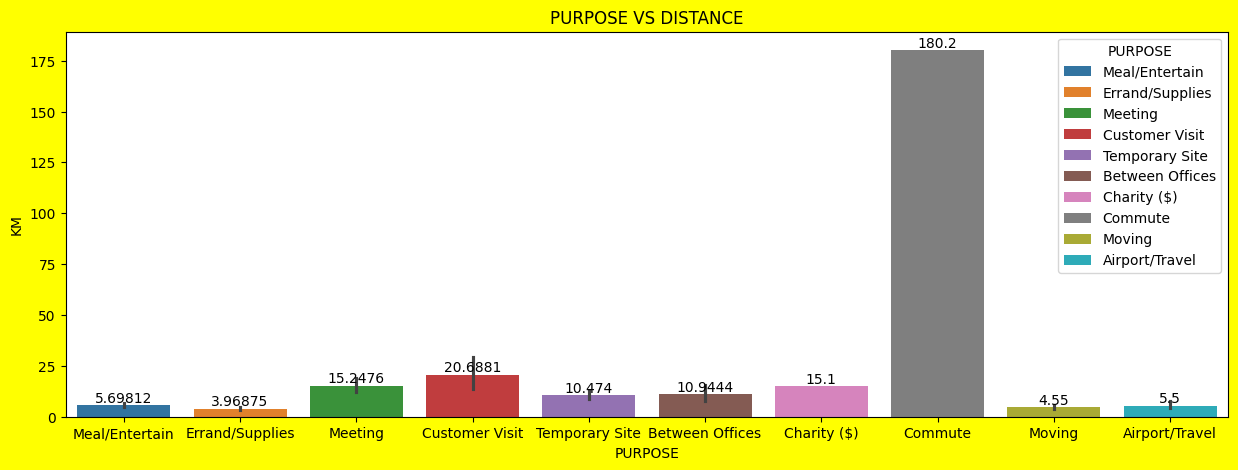

In [19]:
plt.figure(figsize=(15,5),facecolor='YELLOW')
s=sns.barplot(x='PURPOSE',y='KM',data=df,hue='PURPOSE')
for i in s.containers:
  s.bar_label(i)
  plt.title('PURPOSE VS DISTANCE',color='black')

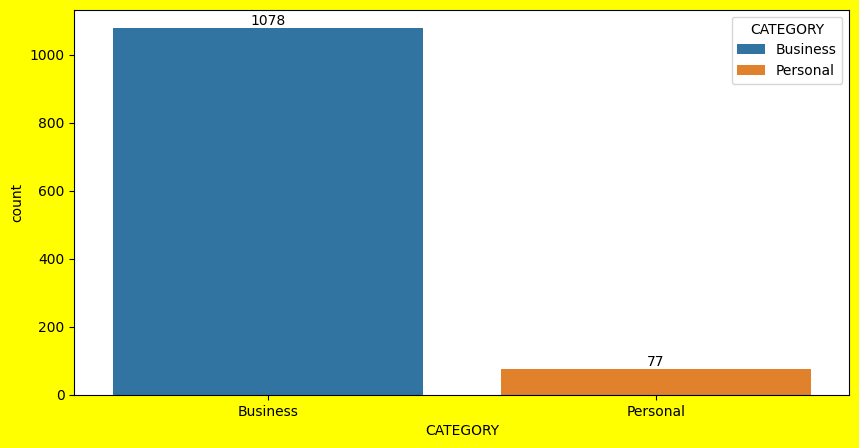

In [20]:
plt.figure(figsize=(10,5),facecolor='YELLOW')
c=df['PURPOSE'].unique()
c
dff=df.groupby(['CATEGORY'])['PURPOSE'].sum()
dff
s=sns.countplot(x='CATEGORY',data=df,hue='CATEGORY')
for i in s.containers:
  s.bar_label(i)

/tmp/ipython-input-3356973001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.index, y=top_pickups.values, palette='dark:blue')


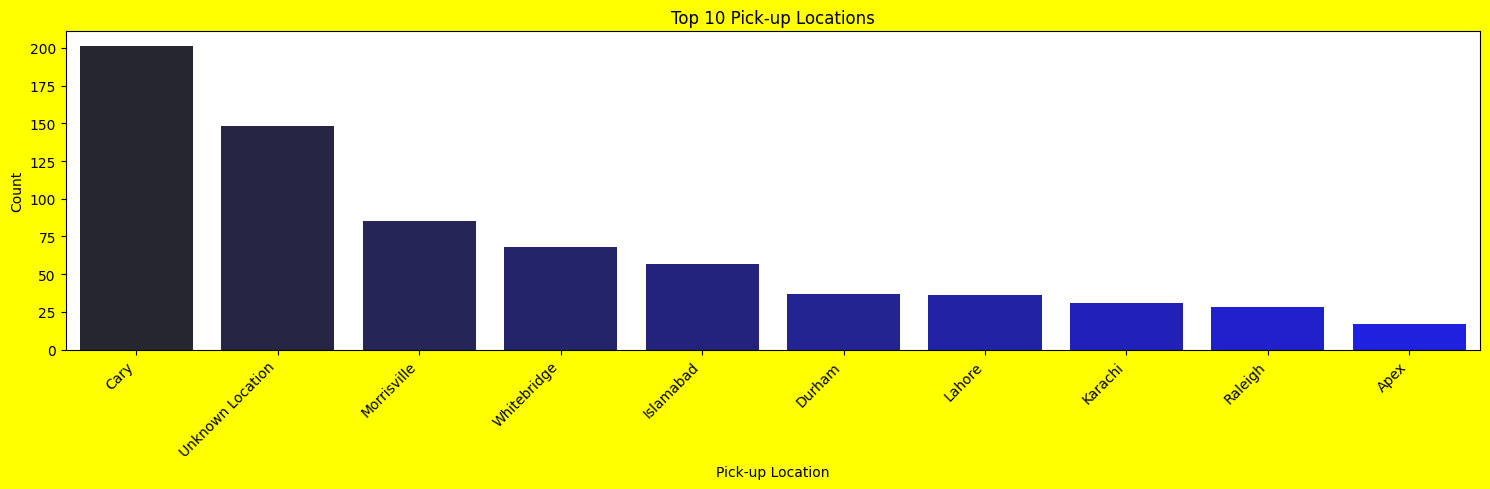

In [54]:
plt.figure(figsize=(15,5),facecolor='YELLOW')
top_pickups = df['PICK_UP'].value_counts().nlargest(10)
sns.barplot(x=top_pickups.index, y=top_pickups.values, palette='dark:blue')
plt.title('Top 10 Pick-up Locations')
plt.xlabel('Pick-up Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

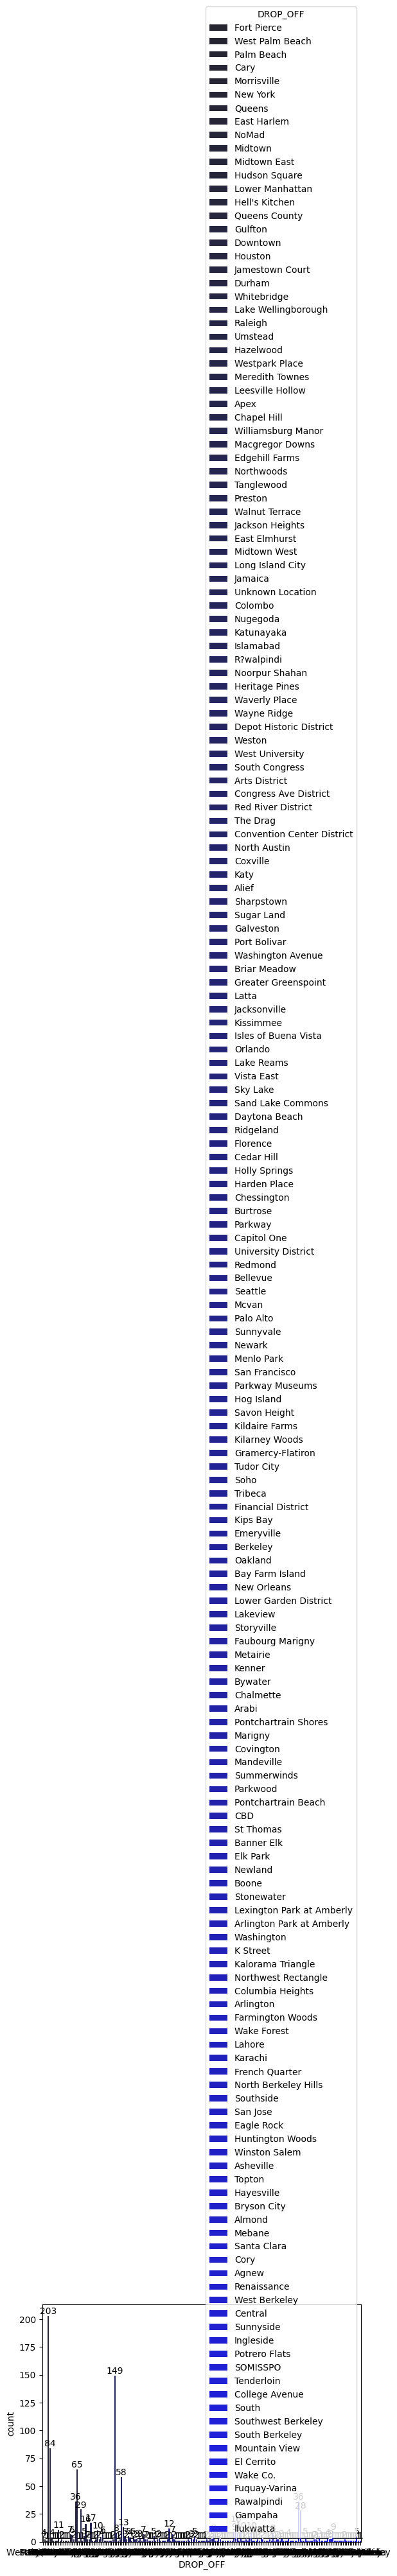

In [18]:
df.groupby('DROP_OFF').value_counts()
df.groupby('DROP_OFF').value_counts()

a=sns.countplot(x='DROP_OFF',data=df,hue='DROP_OFF',palette='dark:blue')
for i in a.containers:
  a.bar_label(i)

<Axes: xlabel='PURPOSE', ylabel='count'>

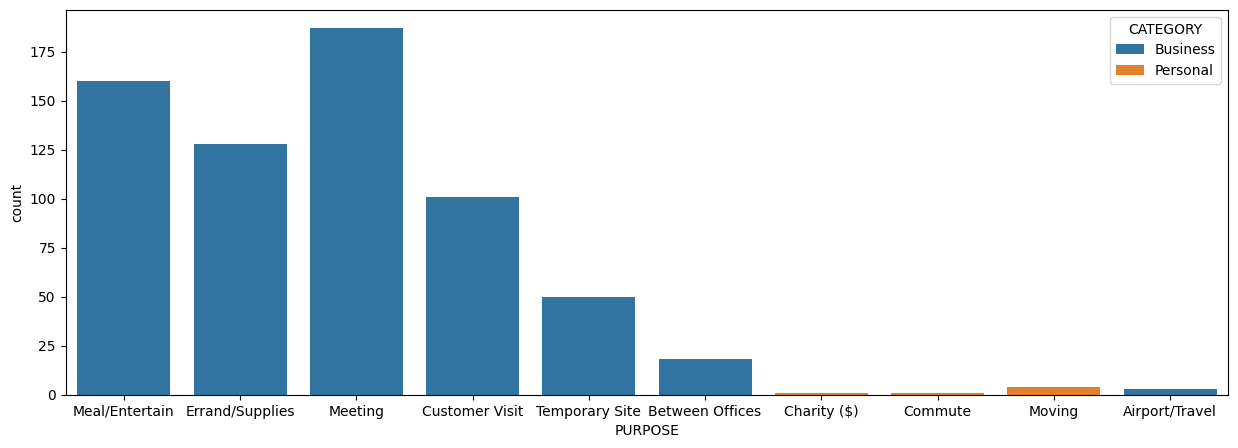

In [15]:
# F
plt.figure(figsize=(15, 5))
sns.countplot(data = df, x = "PURPOSE", hue = "CATEGORY")


/tmp/ipython-input-2205502985.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  A = df.pivot_table(


<Axes: xlabel='PURPOSE', ylabel='TIME_OF_DAY'>

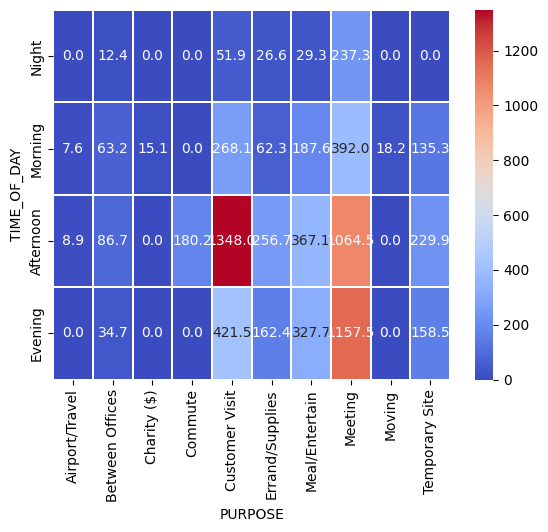

In [60]:
# Categorize START_TIME into time-of-day bins
df['TIME_OF_DAY'] = pd.cut(
    df['START_TIME'],
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    right=False
)

# Create pivot table: rows = TIME_OF_DAY, columns = PURPOSE, values = KM
A = df.pivot_table(
    values='KM',
    index='TIME_OF_DAY',
    columns='PURPOSE',
    aggfunc='sum',
    fill_value=0
)

# Plot heatmap
sns.heatmap(
    A,
    annot=True,
    cmap='coolwarm',
    linewidths=0.2,
    fmt='.1f',  # Correct format string
    cbar=True
)

insifgts

I analyzed that most trips are for business purposes, with Meeting and Customer Visit being the most frequent reasons. The majority of trips occur within Fort Pierce, and peak travel times are during weekday afternoons,

about dataset:- "This dataset contains Uber trip details, including start and end times, locations, miles traveled, and purposes.

The goal of this project was to analyza Uber rides data to identify patterns, optimize operations, and improve customer satisfaction. Specifically, we focused on:

Identifying peak usage hours. Analyzing ride durations and distances. Understanding revenue patterns across regions. Proposing actionable insights to enhance service efficiency. The dataset consisted of: Time Range: One year of Uber rides data. Features: Date, time, pickup and drop-off locations, fare amount, distance, payment methods, and user ratings. Data source: Publicly available Uber dataset on Kaggle or another open source.

Data Quality Issues: Inconsistent date formats (01-01-2016 vs. 12/31/2016). Missing location names Unknown Location. Missing PURPOSE

values -10% of the data.

actions I would recommend using these insights to optimize driver availability during peak times, focus on frequently traveled routes, and address data gaps like Unknown Location to improve data quality for future analysis."